In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [98]:
df = pd.read_csv(r'C:\Users\ASUS\OneDrive\Desktop\projectss\Youtube_Video_Analysis_Python\video_id_info.csv', on_bad_lines='skip')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1424\3908498272.py:1: DtypeWarning:

Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.



In [99]:
df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [100]:
df.tail()

,video_id,comment_text,likes,replies
691395,EoejGgUNmVU,Лучшая,1,0
691396,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0
691397,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0
691398,EoejGgUNmVU,Islığı yeter...,0,0
691399,EoejGgUNmVU,Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...,0,0


In [101]:
df.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [102]:
df.dropna(inplace=True)

In [103]:
df.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

**2. Perform Sentiment Analysis**

In [104]:
import sys
!{sys.executable}  -m pip install textblob

In [105]:
from textblob import TextBlob

In [106]:
df.head(10)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0


In [107]:
df.shape

(691374, 4)

In [108]:
sample_df = df[0:1000]

In [109]:
TextBlob("#1 trending!!!!!!!!!") # Gives Normaal Text Box

TextBlob("#1 trending!!!!!!!!!")

In [110]:
TextBlob("#1 trending!!!!!!!!!").sentiment.polarity #Gives polarity in -1,0,1 as we know "-1=Negative statement", "0=Neutral Statement" and "1=Positive Statement"

0.0

In [111]:
# Performing sentiment for each comment
polarity = []
for comment in df['comment_text']:
    polarity.append(TextBlob(comment).sentiment.polarity)

In [112]:
polarity = []

for comment in df['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)    

In [113]:
len(polarity)

691374

In [114]:
df['polarity'] = polarity

In [115]:
df.head(5)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


**3.. WordCloud Analysis of Your Data**

In [116]:
filter1 = df['polarity']==1
comments_positive=df[filter1]

In [117]:
filter2 = df['polarity']==-1
comments_negative=df[filter2]

In [118]:
#!pip install wordcloud
import sys
!(sys.executable)  pip install wordcloud

pip was unexpected at this time.


In [119]:
from wordcloud import WordCloud, STOPWORDS

In [120]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [121]:
df['comment_text']

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691374, dtype: object

In [122]:
type(df['comment_text'])

pandas.core.series.Series

In [123]:
total_comments_positive = ' '.join(comments_positive['comment_text'])

In [124]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive)

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

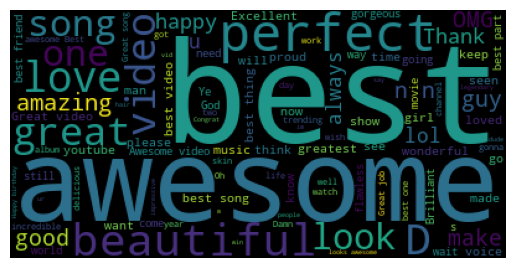

In [125]:
plt.imshow(wordcloud)
plt.axis('off')

**conclusion** ***--> positive users empasizing more on Best, Perfect, Beuatiful. awesome,etcc***

*Same For Negative*

In [126]:
total_comments_negative = ' '.join(comments_negative['comment_text'])

In [127]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_negative)

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

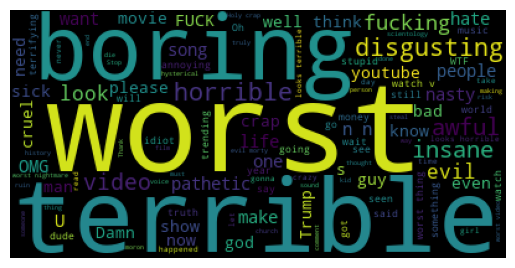

In [128]:
plt.imshow(wordcloud)
plt.axis('off')

**conclusion** ***--> negativetive users empasizing more on Worst, boring, terrible, crap,etcc***

**4.. Emoji Analysis**

In [129]:
#!pip install emoji==2.10.1
import sys
!(sys.executable)  pip install emoji==2.10.1

pip was unexpected at this time.


In [130]:
import emoji

In [131]:
emoji.__version__

'2.10.1'

In [132]:
df['comment_text'].head(5)

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
Name: comment_text, dtype: object

In [133]:
comment = "trending 😉"

In [134]:
[char for char in comment if char in emoji.EMOJI_DATA]

['😉']

In [135]:
emoji_list = []

for char in comment:
    if char in emoji.EMOJI_DATA:
        emoji_list.append(char)
        
emoji_list        

['😉']

In [136]:
all_emojis_list = []

for comment in df['comment_text'].dropna():
    for char in comment:
        if char in emoji.EMOJI_DATA:
             all_emojis_list.append(char)
       
    


In [137]:
all_emojis_list[0:10] #1st 10 emojis

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

 *we have to comput frequencies of each and every emoji in "all_emojis_list"*

In [138]:
from collections import Counter #collection package

In [139]:
Counter(all_emojis_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [140]:
Counter(all_emojis_list).most_common(10)[0]

('😂', 36987)

In [141]:
Counter(all_emojis_list).most_common(10)[0][0]

'😂'

In [142]:
Counter(all_emojis_list).most_common(10)[1][0]

'😍'

In [143]:
Counter(all_emojis_list).most_common(10)[2][0]

'❤'

In [144]:
Counter(all_emojis_list).most_common(10)[0][1]

36987

In [145]:
Counter(all_emojis_list).most_common(10)[1][1]

33453

In [146]:
Counter(all_emojis_list).most_common(10)[2][1]

31119

In [147]:
freqs = [Counter(all_emojis_list).most_common(10)[i][1] for i in range(10)]
freqs

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [148]:
emojis = [Counter(all_emojis_list).most_common(10)[i][0] for i in range(10)]
emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [149]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [150]:
import plotly
print(plotly.__version__)


5.22.0


In [174]:
import plotly.io as pio
pio.renderers.default = 'notebook_connected'

In [175]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [190]:
trace = go.Bar(x=emojis, y=freqs)

In [191]:
plot([trace])

'temp-plot.html'

**Conclusion** :-- *Majority of the customers are happy as they used emojis like :funny, Love, Heart , Outstanding, etc*

**5.. Collect Entire Data Of Youtube**

In [200]:
import os

In [215]:
files = os.listdir(r'C:\Users\ASUS\OneDrive\Desktop\projectss\Youtube_Video_Analysis_Python\YT_additional_data')

In [216]:
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'README.md',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [217]:
# Extracting Csv files only from above list

files_csv = [file for file in files if '.csv' in file]



In [218]:
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [219]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [221]:
# all the csv file i have to store in big data frame
full_df = pd.DataFrame()

path = r'C:\Users\ASUS\OneDrive\Desktop\projectss\Youtube_Video_Analysis_Python\YT_additional_data'

for file in files_csv:
    current_df = pd.read_csv(path+'/'+file, encoding='iso-8859-1')
    full_df = pd.concat([full_df,current_df], ignore_index=True)

In [222]:
full_df.shape

(375942, 16)

In [223]:
full_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
375937     True
375938    False
375939    False
375940    False
375941    False
Length: 375942, dtype: bool

In [224]:
full_df[full_df.duplicated()].shape

(36417, 16)

In [226]:
full_df = full_df.drop_duplicates()  # This Drops Duplicates rows

In [227]:
full_df.shape

(339525, 16)

In [234]:
## a.. Storing data into csv files
full_df[0:1000].to_csv(r'C:\Users\ASUS\OneDrive\Desktop\projectss\Youtube_Video_Analysis_Python\YT_additional_data\export_data/youtube_sample.csv', index=False)

In [235]:
## b.. Storing data into json files
full_df[0:1000].to_json(r'C:\Users\ASUS\OneDrive\Desktop\projectss\Youtube_Video_Analysis_Python\YT_additional_data\export_data/youtube_sample.json')

**6.. Which Category has the maximum likes ?**

In [237]:
full_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...


In [238]:
full_df['category_id'].unique()  # Returns an array containing the unique values of the category_id

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44])

In [248]:
json_df = pd.read_json(r'C:\Users\ASUS\OneDrive\Desktop\projectss\Youtube_Video_Analysis_Python\YT_additional_data/US_category_id.json')

In [249]:
json_df

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
5,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
6,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
7,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
8,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
9,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [250]:
json_df.keys()

Index(['kind', 'etag', 'items'], dtype='object')

In [252]:
json_df['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [255]:
cat_dict = {} # Empty Dictionary

In [256]:
for item in json_df['items'].values:
    cat_dict[int(item['id'])] = item['snippet']['title']

In [257]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [258]:
full_df['category_name'] = full_df['category_id'].map(cat_dict)

In [259]:
full_df['category_name']

0                    Music
1                   Comedy
2                   Comedy
3            Entertainment
4                    Music
                ...       
375936      People & Blogs
375938      People & Blogs
375939       Entertainment
375940    Film & Animation
375941              Gaming
Name: category_name, Length: 339525, dtype: object

In [260]:
full_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Music'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Entertainment'),
  Text(3, 0, 'News & Politics'),
  Text(4, 0, 'People & Blogs'),
  Text(5, 0, 'Howto & Style'),
  Text(6, 0, 'Film & Animation'),
  Text(7, 0, 'Science & Technology'),
  Text(8, 0, 'Gaming'),
  Text(9, 0, 'Sports'),
  Text(10, 0, 'Nonprofits & Activism'),
  Text(11, 0, 'Pets & Animals'),
  Text(12, 0, 'Travel & Events'),
  Text(13, 0, 'Autos & Vehicles'),
  Text(14, 0, 'Education'),
  Text(15, 0, 'Shows'),
  Text(16, 0, 'Movies'),
  Text(17, 0, 'Trailers')])

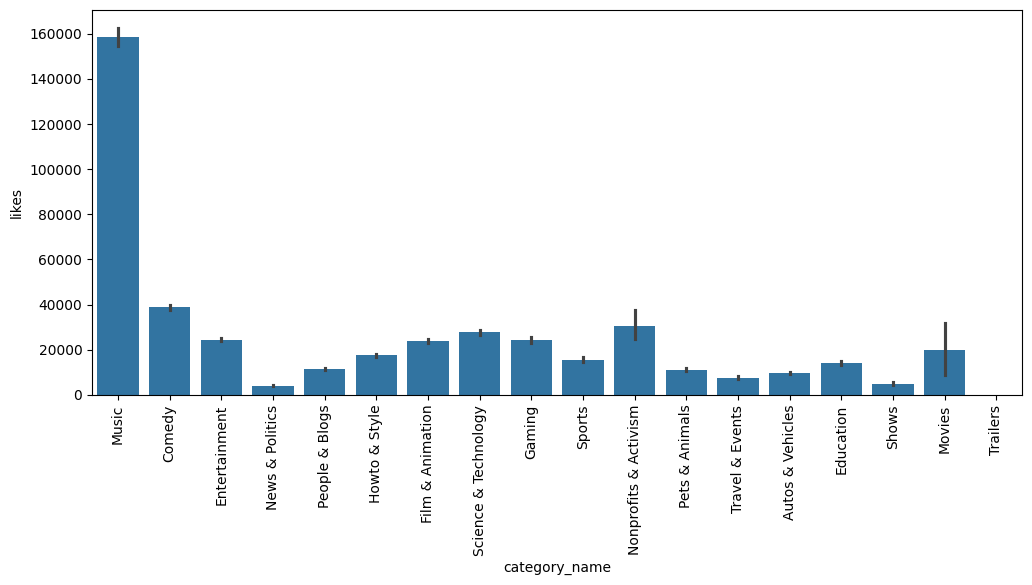

In [267]:
#Which Category has the maximum likes?

plt.figure(figsize=(12,5))
sns.barplot(x='category_name', y='likes', data=full_df)
plt.xticks(rotation='vertical')

**7.. Finding Out Wheather Audience is Engaged or Not?**

Like Rate, Dislike, Comment_Count_Rate

In [268]:
(full_df['likes']/full_df['views'])*100

0          4.589104
1         12.594873
2          4.575843
3          6.309630
4          4.874563
            ...    
375936     7.820293
375938     5.635623
375939     4.507286
375940     3.408645
375941     3.464728
Length: 339525, dtype: float64

In [269]:
full_df['like_rate'] = (full_df['likes']/full_df['views'])*100
full_df['dislike_rate'] =(full_df['dislikes']/full_df['views'])*100
full_df['comment_count_rate'] = (full_df['comment_count']/full_df['views'])*100

In [274]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

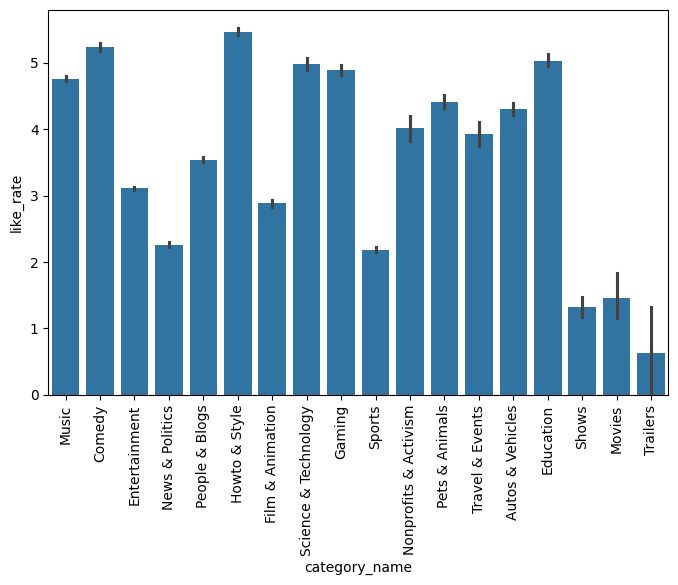

In [279]:
# Creating box plot for like rate

plt.figure(figsize=(8,5))
sns.barplot(x='category_name' , y='like_rate', data=full_df)
plt.xticks(rotation='vertical')
plt.show

**Analysing Relationship Between Views And Likes**

<Axes: xlabel='views', ylabel='likes'>

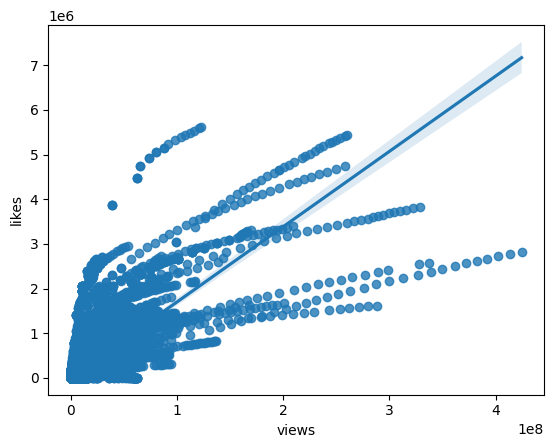

In [280]:
sns.regplot(x='views', y='likes', data=full_df)

In [281]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

In [283]:
full_df[['views','likes','dislikes']]

,views,likes,dislikes
0,17158579,787425,43420
1,1014651,127794,1688
2,3191434,146035,5339
3,2095828,132239,1989
4,33523622,1634130,21082
...,...,...,...
375936,8259128,645888,4052
375938,1064798,60008,382
375939,1066451,48068,1032
375940,5660813,192957,2846


In [284]:
full_df[['views','likes','dislikes']].corr() ## finding co-relation between ['views','likes','dislikes']

,views,likes,dislikes
views,1.000000,0.779531,0.405428
likes,0.779531,1.000000,0.451809
dislikes,0.405428,0.451809,1.000000


<Axes: >

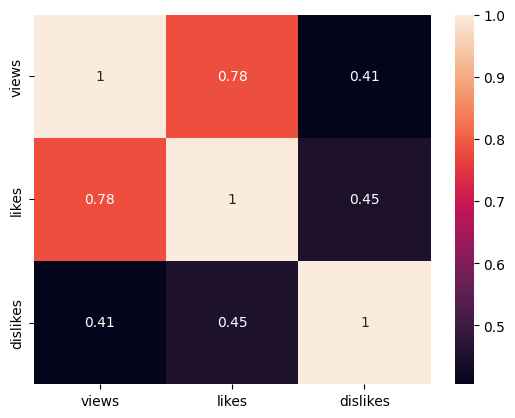

In [285]:
sns.heatmap(full_df[['views','likes','dislikes']].corr(), annot=True)

**9.. Which Channels Have The Largest number Of Trending Videos?**

In [286]:
full_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,comment_count_rate
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music,4.589104,0.253051,0.733639
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,12.594873,0.166363,1.284185
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy,4.575843,0.167292,0.256342
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,6.309630,0.094903,0.835851
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music,4.874563,0.062887,0.253752


In [287]:
full_df['channel_title'].value_counts()

channel_title
The Late Show with Stephen Colbert    710
WWE                                   643
Late Night with Seth Meyers           592
TheEllenShow                          555
Jimmy Kimmel Live                     528
                                     ... 
The Secrets of Dairy                    1
babygranderecords                       1
24 Oras News Today                      1
turk2doubleoh8                          1
BOOMPANOT.COM                           1
Name: count, Length: 37824, dtype: int64

In [288]:
full_df.groupby(['channel_title']).size()

channel_title
! ì¸ìì ë¬´ì¨ì¼ì´                   7
!!8æã ãé¢ç½ãã¿å¤§éå          1
!BTSã»TWICE ã¾ã¨ã                     1
!Los amorosos ViralesÂ¡                    2
!t Live                                    3
                                          ..
ï¼åã§ã§ãã DIY                     5
ï¼¢ï¼¡ï¼³ï¼¨ï½ï½                         2
ï¼«ã®ãã£ãã·ã³ã°ã¡ããã­ã    1
ï¼·ï¼¡ï¼ªï¼¯ï¼©ï¼«ï¼¡                      2
ðSandrea                                2
Length: 37824, dtype: int64

In [289]:
cdf = full_df.groupby(['channel_title']).size().sort_values(ascending=False).reset_index()

In [290]:
cdf

,channel_title,0
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Tesoros Enterrados,1
37820,Anton Neverov,1
37821,Thalia 444,1
37822,Thaitv6 Official,1


In [291]:
cdf = cdf.rename(columns={0:'total_videos'})

In [292]:
cdf

,channel_title,total_videos
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Tesoros Enterrados,1
37820,Anton Neverov,1
37821,Thalia 444,1
37822,Thaitv6 Official,1


In [293]:
import plotly.express as px

In [299]:
px.bar(data_frame=cdf[0:20], x='channel_title', y='total_videos')
# It Gives Which Channel Have The Largest Number Of Trending Videos?

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'channel_title=%{x}<br>total_videos=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['The Late Show with Stephen Colbert', 'WWE',
                          'Late Night with Seth Meyers', 'TheEllenShow', 'Jimmy Kimmel Live',
                          'PewDiePie', 'The Tonight Show Starring Jimmy Fallon', 'CNN',
                          'The Late Late Show with James Corden', 'ESPN', 'FBE', 'VikatanTV',
                          'Netflix', 'SET India', 'MLG Highlights', 'BuzzFeedVideo', 'SMTOWN',
                          'Ã\x87ukur', 'Marvel Entertainment', 'SAB TV'], dtype=object),
              'xaxis': 'x',
              'y': array([710, 643, 592, 555, 528, 511, 509, 500, 453, 452, 439, 435, 410, 405,
                          382, 361, 359, 356, 352, 351]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'channel_title'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'total_videos'}}}
})